# Linear Regression
1.About this Sprint
* The purpose of this Sprint
* Understanding linear regression through scratch
* Get used to object-oriented implementation
Allow formulas to be incorporated into code

## How to learn
After implementing linear regression with scratch, we will train and verify.

## Scratch Linear Regression
We will create a class of linear regression from scratch. We will implement the algorithm using only the minimum library such as NumPy.

The template is prepared below. Add some code to this ScratchLinearRegression class.



In [27]:
import numpy as np
import pandas as pd
class ScratchLinearRegression():
    """
    Scratch implementation of linear regression
    
    Parameters
    ----------
    num_iter : int
      Number of iterations
    lr : float
      Learning rate
    no_bias : bool
      True if no bias term is included
    verbose : bool
      True to output the learning process
    
    Attributes
    ----------
    self.coef_ : ndarray, shape (n_features,)
      Parameters
    self.loss : ndarray, shape (self.iter,)
      Record losses on training data
    self.val_loss : ndarray, shape (self.iter,)
      Record loss on validation data
    """
    def _linear_hypothesis(self, X):
        """
        Compute a linear hypothetical function
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
          Training data
        Returns
        -------
          ndarray, shape (n_samples, 1)
          Estimated result by linear hypothetical function
        """
        y_hyp = np.dot(X, self.theta.T)
        return y_hyp
    def _gradient_descent(self, X, y, y_hyp):
        """
        Update new theta j in the steepest decent method
        Parameters
        ----------
        X: ndarray, shape (n_samples, n_features)
            Training data
        y: ndarray, shape (n_samples,)
            Correct answer value of training data
        y_hyp: ndarray, shape (n_samples, 1)
        Returns
        -------
        update_theta: ndarray, shape (n_features, 1)
          New theta value
        """
        n_samples = X.shape[0]
        update_theta = self.theta - (self.lr * np.dot((y_hyp - y), X) / n_samples)
        return update_theta

    def __init__(self, num_iter=1000, lr=0.01, no_bias=False, verbose=False):
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        Learn linear regression. If validation data is entered, 
        the loss and accuracy for it are also calculated for each iteration.
        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Features of training data
        y : ndarray, shape (n_samples,)
            Correct answer value of training data
        X_val : ndarray, shape (n_samples, n_features)
            Features of verification data
        y_val : ndarray, shape (n_samples,)
            Correct value of verification data
        """
        n_samples = X.shape[0]
        n_features = X.shape[1]
        
        if not self.no_bias:
            X = np.hstack([np.ones([n_samples, 1]), X])
        
       
        self.theta = np.random.rand(n_features + (1 - self.no_bias))
        
        for i in range(self.iter):
            y_hyp = self._linear_hypothesis(X)
            self.theta = self._gradient_descent(X, y, y_hyp)
            self.loss[i] = self._loss_function(y_hyp, y)
            
            if X_val is not None and y_val is not None:
                y_predict = self.predict(X_val)
                self.val_loss[i] = self._loss_function(y_predict, y_val)
                
        if self.verbose:
            print("Loss: {}".format(self.loss))
            print("Val_loss: {}".format(self.val_loss))
        pass
        
    def predict(self, X):
        """
        Estimate using linear regression.
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            sample
        Returns
        -------
            ndarray, shape (n_samples, 1)
            Estimated result by linear regression
        """
        if not self.no_bias:
            n_samples = X.shape[0]
            X = np.hstack([np.ones([n_samples, 1]), X])
        return np.dot(X, self.theta.T)
    def _loss_function(self, y_pred, y):
        """
        Calculation of objective function.
        Parameters
        ----------
        y_pred : The following forms of ndarray, shape (n_samples,)
          Estimated value
        y : The following forms of ndarray, shape (n_samples,)
          Correct answer value
        Returns
        ----------
        loss: numpy.float
          Result of the loss function
        """
        loss = np.mean((y_pred - y) ** 2)
        return loss
    def MSE(y_pred, y):
        """
        Calculation of mean square error
        Parameters
        ----------
        y_pred : The following forms of ndarray, shape (n_samples,)
          Estimated value
        y : The following forms of ndarray, shape (n_samples,)
          Correct answer value
        Returns
        ----------
        mse : numpy.float
          Mean squared error
        """
        n_samples = y.shape[0]
        mse = np.mean((y_pred - y)[1:] ** 2)
        return mse


# 【problem1】Hypothetical function



Implement the linear regression hypothetical function represented by the following formula. I have prepared a method template _linear_hypothesis
$
h_\theta(x) = \theta_0 x_0 + \theta_1 x_1 + \dots + \theta_j x_j + \dots + \theta_n x_n \quad (x_0 = 1)
$



# 【problem2】Steepest descent
Implement the steepest descent method for training. Add a method _gradient_descent that updates the parameters as in the following equation, and
Please it call from the fit method.
def _gradient_descent

$\theta_j := \theta_j - \alpha \cdot \frac{1}{m} \sum_{i=1}^{m} \left[ \left( h_\theta(x^{(i)}) - y^{(i)} \right) \cdot x_j^{(i)} \right]
$

# 【problem 3】Estimated
Please implement the estimation mechanism. Add it to the predict method included in the template of the ScratchLinearRegression class.
def fit(self, X, y, X_val=None, y_val=None), def predict(self, X)

$h_\theta(x) = \theta^T \cdot x
$

# 【problem 4】Mean squared error

Create a function of mean square error (MSE) used as an index value for linear regression.

Since the mean square error function is a function that can be used for regression problems in general, create it as a separate function instead of the method of the ScratchLinearRegression class. We have a template.

def MSE(y_pred, y)

$L(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2
$

# 【problem 5】Objective function
Implement the objective function (loss function) of linear regression represented by the following formula and be sure to record this inself.loss,self.val_loss.
def _loss_function(self, y_pred, y)

$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2
$

In [33]:
X = np.array([
    [1, 2],
    [3, 4],
    [5, 6],
    [7, 8],
    [9, 10]
])
X.shape


(5, 2)

In [34]:
# Let y = 2x1 + 1x2
y = np.array([4, 10, 16, 22, 28])
y.shape

(5,)

In [35]:
slr = ScratchLinearRegression(100, 0.01, False, True)

In [36]:
theta = slr.fit(X, y)

Loss: [86.27035599  4.83663187  0.78042538  0.5752236   0.56170214  0.55774078
  0.5542755   0.55085507  0.54745691  0.54407977  0.54072346  0.53738786
  0.53407284  0.53077827  0.52750402  0.52424997  0.52101599  0.51780196
  0.51460776  0.51143326  0.50827834  0.50514289  0.50202678  0.49892989
  0.4958521   0.49279331  0.48975338  0.4867322   0.48372966  0.48074564
  0.47778003  0.47483271  0.47190358  0.46899251  0.46609941  0.46322414
  0.46036662  0.45752672  0.45470434  0.45189938  0.44911171  0.44634125
  0.44358787  0.44085148  0.43813196  0.43542923  0.43274316  0.43007367
  0.42742064  0.42478398  0.42216359  0.41955936  0.41697119  0.41439899
  0.41184266  0.40930209  0.4067772   0.40426789  0.40177405  0.3992956
  0.39683243  0.39438446  0.3919516   0.38953374  0.38713079  0.38474267
  0.38236928  0.38001053  0.37766633  0.37533659  0.37302123  0.37072015
  0.36843326  0.36616048  0.36390172  0.36165689  0.35942591  0.35720869
  0.35500515  0.35281521  0.35063877  0.348475

In [37]:
slr_predict = slr.predict(X)
slr_predict

array([ 4.95349605, 10.60207149, 16.25064693, 21.89922237, 27.5477978 ])

In [38]:
MSE(y,slr_predict)

0.15998922993502118

# Problem 6 Learning and Estimation
Learn and estimate scratch implementations from the House Prices competition data provided in Sprint, an introduction to machine learning scratch.

Compare this with the scikit-learn implementation and see if it works correctly.

In [9]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
X = df[['GrLivArea']].values
y = df['SalePrice'].values

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1095, 1) (365, 1) (1095,) (365,)


In [12]:
X[:5]

array([[1710],
       [1262],
       [1786],
       [1717],
       [2198]])

In [13]:
y[:5]

array([208500, 181500, 223500, 140000, 250000])

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
slr_house = ScratchLinearRegression()
slr_house.fit(X_train_scaled, y_train, X_test_scaled, y_test)
y_house_predict = slr_house.predict(X_test_scaled)

pd.DataFrame([y_house_predict, y_test])

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
0,271913.562252,173092.007093,235959.985144,253835.209921,159380.897179,200311.099367,176443.611739,174615.46375,189342.211436,250889.860384,...,157552.74919,182639.002144,200209.53559,224686.405881,189748.466544,155623.037425,243678.832207,104739.585077,216459.739933,128200.817596
1,160000.000000,174000.000000,211000.000000,222000.000000,153000.000000,130000.000000,168500.000000,215000.00000,140000.000000,180000.000000,...,245500.00000,118858.000000,130000.00000,236000.000000,107400.000000,155000.000000,137900.000000,129500.000000,197500.000000,178400.000000


In [31]:
MSE(y_house_predict, y_test)

2038777071.7189274

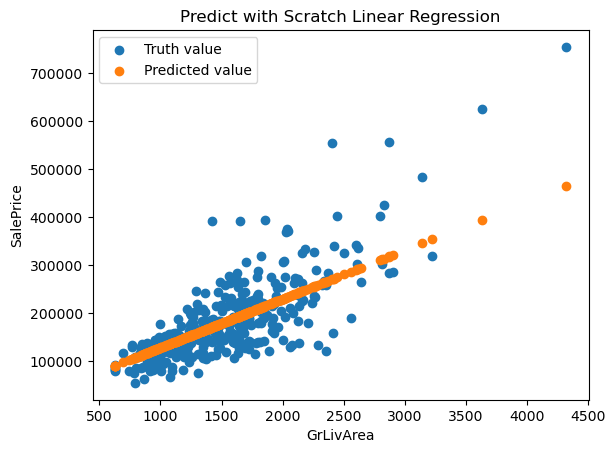

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('Predict with Scratch Linear Regression')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.scatter(X_test, y_test, label='Truth value')
plt.scatter(X_test, y_house_predict, label='Predicted value')
plt.legend()
plt.show()

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr_predict = lr.predict(X_test_scaled)

pd.DataFrame([lr_predict, y_test], index=['Predicted value', 'Truth value'])

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
Predicted value,271925.301552,173099.479981,235970.172224,253846.168726,159387.778119,200319.747382,176451.229325,174623.00241,189350.385892,250900.69203,...,157559.551204,182646.887204,200218.17922,224696.106248,189756.65854,155629.756127,243689.352532,104744.106993,216469.085131,128206.352402
Truth value,160000.000000,174000.000000,211000.000000,222000.000000,153000.000000,130000.000000,168500.000000,215000.00000,140000.000000,180000.00000,...,245500.000000,118858.000000,130000.00000,236000.000000,107400.00000,155000.000000,137900.000000,129500.000000,197500.000000,178400.000000


In [19]:
mean_squared_error(y_test, lr_predict)

2991215441.9166803

### Problem 7 Plotting the learning curve


Create and execute a function that displays the learning curve. Look at the graph to see if the loss is down properly.

In the template of the linear regression class, the loss is recorded in self.loss and self.val_loss, so please use this for input.



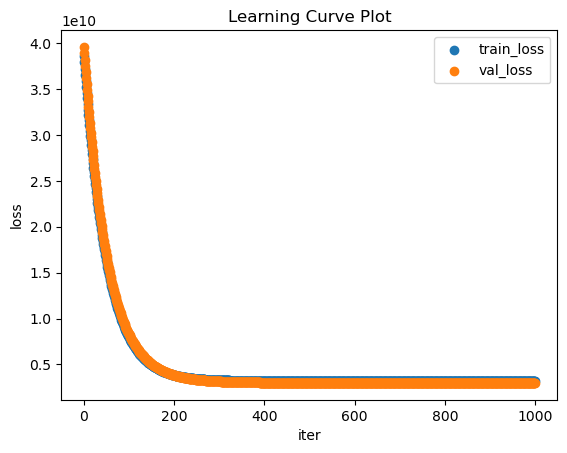

In [20]:
plt.title('Learning Curve Plot')
plt.xlabel('iter')
plt.ylabel('loss')
plt.scatter(range(slr_house.iter), slr_house.loss, label='train_loss')
plt.scatter(range(slr_house.iter), slr_house.val_loss, label='val_loss')
plt.legend()
plt.show()

### 【problem 8】(Advance task) Removal of bias term

---



In [21]:
slr_nobias = ScratchLinearRegression(no_bias=True)
slr_nobias.fit(X_train_scaled, y_train)
slr_nobias_predict = slr_nobias.predict(X_test_scaled)

pd.DataFrame([slr_nobias_predict, y_test], index=['Predict value', 'Truth value'])

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
Predict value,91556.545132,-7265.01002,55602.968027,73478.192802,-20976.119933,19954.082252,-3913.405374,-5741.553363,8985.194322,70532.843266,...,-22804.267921,2281.985031,19852.518475,44329.388765,9391.44943,-24733.979687,63321.815089,-75617.432032,36102.722817,-52156.199513
Truth value,160000.000000,174000.00000,211000.000000,222000.000000,153000.000000,130000.000000,168500.000000,215000.000000,140000.000000,180000.000000,...,245500.000000,118858.000000,130000.000000,236000.000000,107400.00000,155000.000000,137900.000000,129500.000000,197500.000000,178400.000000


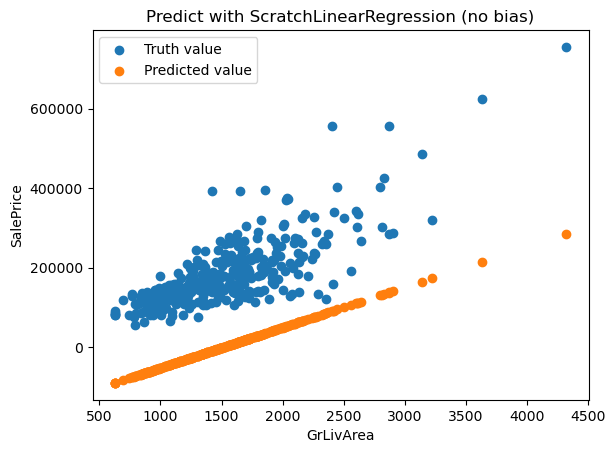

In [22]:
plt.title('Predict with ScratchLinearRegression (no bias)')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.scatter(X_test, y_test, label='Truth value')
plt.scatter(X_test, slr_nobias_predict, label='Predicted value')
plt.legend()
plt.show()

The bias term is used to allow models to represent patterns that do not pass through the origin. In this problem, when there is no bias term, the predicted sale price can be negative and most predicted values is smaller than expected values. The bias term now shifts the sale price up on y-axis.

### 【problem 9】(Advance task) Multidimensional feature quantity

---



In [23]:
X = df[['GrLivArea', 'YearBuilt']].values
y = df['SalePrice'].values

X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1095, 2) (365, 2) (1095,) (365,)


In [24]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


slr_house = ScratchLinearRegression()
slr_house.fit(X_train_scaled, y_train, X_test_scaled, y_test)
y_house_predict = slr_house.predict(X_test_scaled)

pd.DataFrame([y_house_predict, y_test])

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
0,246153.975674,265582.753359,301877.233019,121269.309464,131912.17306,138426.852973,222670.59974,147298.684411,115839.732787,207356.049625,...,259507.834043,156790.788611,185363.38413,101095.379585,184634.15439,203087.534011,124674.974533,231517.76735,187582.918259,224746.617446
1,215000.000000,253293.000000,301000.000000,124500.000000,135000.00000,140000.000000,200000.00000,166000.000000,62383.000000,179200.000000,...,271900.000000,144500.000000,143900.00000,105500.000000,240000.00000,181134.000000,119900.000000,205950.00000,151000.000000,169000.000000


In [28]:
MSE(y_house_predict, y_test)

2038777071.7189274

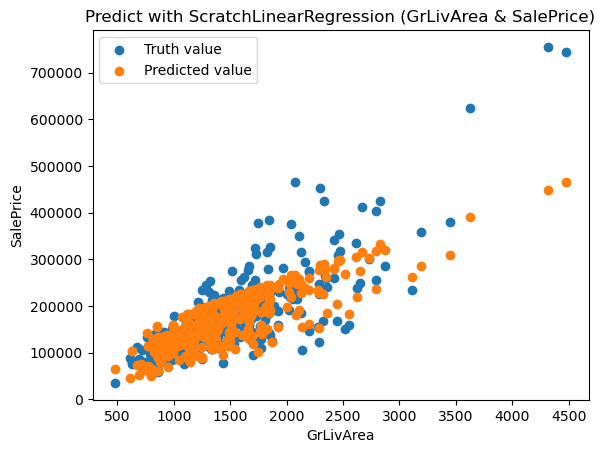

 -----------------------------------------------------------------


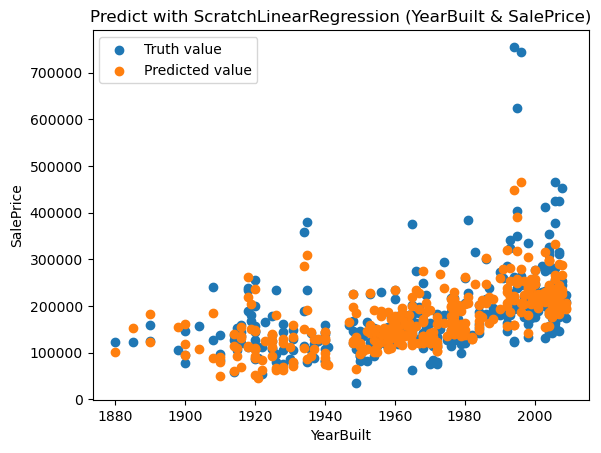

In [26]:
plt.title('Predict with ScratchLinearRegression (GrLivArea & SalePrice)')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.scatter(X_test[:, 0], y_test, label='Truth value')
plt.scatter(X_test[:, 0], y_house_predict, label='Predicted value')
plt.legend()
plt.show()

print(" -----------------------------------------------------------------")


plt.title('Predict with ScratchLinearRegression (YearBuilt & SalePrice)')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.scatter(X_test[:, 1], y_test, label='Truth value')
plt.scatter(X_test[:, 1], y_house_predict, label='Predicted value')
plt.legend()
plt.show()

### 【problem 10】(Advance task) Derivation of update formula

---



The update formula for the steepest descent method was as follows. Explain the process by which this equation is derived.

$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}[(h_\theta(x^{(i)}) - y^{(i)} )x_{j}^{(i)}]\$

To optimize 𝜃, we consider the following equation using the steepest descent descent method. This equation calculates the derivative of the objectives function J with respect to 𝜃 (the slope of J), and updates 𝜃 by the slope x learning rate.


$
\theta_j := \theta_j - \frac{\partial}{\partial \theta_j}J(\theta) \\\
$

$
J(\theta)=  \frac{1 }{ 2m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2.
$


Hence,

$
\frac{\partial J}{\partial x} = \frac{1}{2m} \frac{\partial  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2}{\partial x}
$

$
\frac{\partial J}{\partial x} = \frac{1}{2m} \sum_{i=1}^{m} 2(h_\theta(x^{(i)}) - y^{(i)}) \frac{\partial (h_\theta(x^{(i)}) - y^{(i)})}{\partial \theta_j}
$

$
\frac{\partial J}{\partial x} = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) \frac{\partial (\theta_j x_j^{(i)} - y^{(i)})}{\partial \theta_j}
$

$
\frac{\partial J}{\partial x} = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)}
$

Therefore, 

$
\theta_j = \theta_j - \alpha \frac{\partial}{\partial \theta_j}J(\theta) = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}[(h_\theta(x^{(i)}) - y^{(i)} )x_{j}^{(i)}]
$
